# Q1. Kmeans 

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('crime_data.csv')
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
data=data.rename(columns={'Unnamed: 0':'states','Murder':'murder','Assault':'assault','UrbanPop':'urbanpop','Rape':'rape'})

In [5]:
data.head()

,states,murder,assault,urbanpop,rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [11]:
data1=data.iloc[:,1:]

In [13]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
data0 = sc.fit_transform(data1)

In [14]:
data0

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

In [15]:
from sklearn.cluster import KMeans
cyber=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit_predict(data0)
    cyber.append(kmeans.inertia_) 

In [16]:
cyber

[13.184122550256445,
 6.596893867946196,
 5.010878493006417,
 3.683456153585914,
 3.22507225604479,
 2.8520398885211113,
 2.584866411431045,
 2.314201689711637,
 2.1259292651810116]

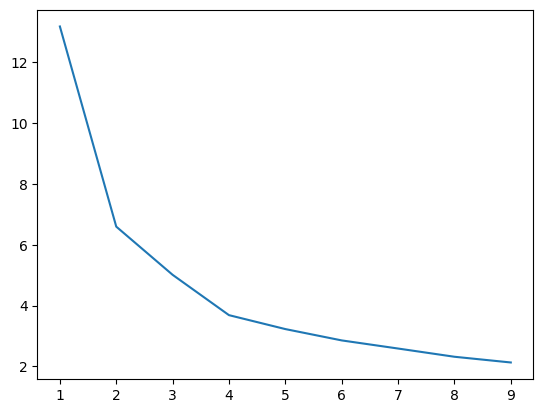

In [17]:
plt.plot(range(1,10),cyber)

In [18]:
kmeans=KMeans(n_clusters=4,max_iter=100,random_state=42)
kmeans.fit(data0)

KMeans(max_iter=100, n_clusters=4, random_state=42)

In [19]:
group= kmeans.predict(data0)

In [21]:
type(group)

numpy.ndarray

In [22]:
ndata=pd.DataFrame(group,columns=['groups'])

In [23]:
type(ndata)

pandas.core.frame.DataFrame

In [25]:
data1['group']=ndata['groups']
data1['states']=data['states']
data1['states'].head()

0       Alabama
1        Alaska
2       Arizona
3      Arkansas
4    California
Name: states, dtype: object

In [27]:
data1.head()

,murder,assault,urbanpop,rape,group,states
0,13.2,236,58,21.2,2,Alabama
1,10.0,263,48,44.5,1,Alaska
2,8.1,294,80,31.0,1,Arizona
3,8.8,190,50,19.5,2,Arkansas
4,9.0,276,91,40.6,1,California


In [28]:
data1[data1['group']==0]

,murder,assault,urbanpop,rape,group,states
11,2.6,120,54,14.2,0,Idaho
14,2.2,56,57,11.3,0,Iowa
16,9.7,109,52,16.3,0,Kentucky
18,2.1,83,51,7.8,0,Maine
22,2.7,72,66,14.9,0,Minnesota
25,6.0,109,53,16.4,0,Montana
26,4.3,102,62,16.5,0,Nebraska
28,2.1,57,56,9.5,0,New Hampshire
33,0.8,45,44,7.3,0,North Dakota
40,3.8,86,45,12.8,0,South Dakota


In [29]:
data1['group'].value_counts()

3    17
0    13
1    12
2     8
Name: group, dtype: int64

In [30]:
data1[data1['group']==3]

,murder,assault,urbanpop,rape,group,states
6,3.3,110,77,11.1,3,Connecticut
7,5.9,238,72,15.8,3,Delaware
10,5.3,46,83,20.2,3,Hawaii
13,7.2,113,65,21.0,3,Indiana
15,6.0,115,66,18.0,3,Kansas
20,4.4,149,85,16.3,3,Massachusetts
24,9.0,178,70,28.2,3,Missouri
29,7.4,159,89,18.8,3,New Jersey
34,7.3,120,75,21.4,3,Ohio
35,6.6,151,68,20.0,3,Oklahoma


In [31]:
from sklearn.metrics import silhouette_score
silhouette_score(data0,kmeans.fit_predict(data0))

0.34089035600743633

# Q2. KMeans for ariline data

In [32]:
air= pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

In [33]:
air.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [36]:
air=air.drop('ID#',axis=1)

In [37]:
air.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
mm=MinMaxScaler()
mg=mm.fit_transform(air)

In [42]:
from sklearn.cluster import KMeans
cyber=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state=42)
    km.fit_predict(mg)
    cyber.append(km.inertia_)

In [43]:
cyber

[1830.7932128584116,
 823.6756984125207,
 625.168488157072,
 436.70885761932624,
 348.94332172541374,
 315.3155964842891,
 287.7310054422424,
 263.21321889148976,
 245.40617070458347,
 226.10812108252125]

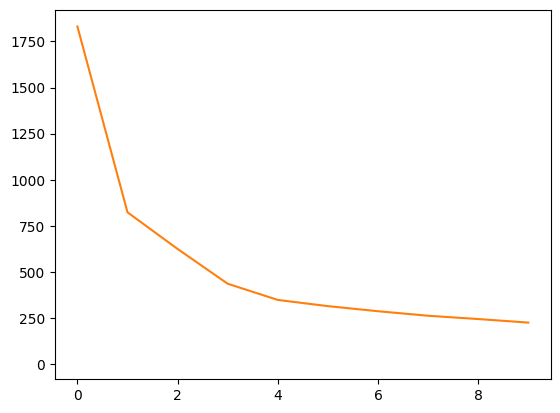

In [44]:
plt.plot(1,10,cyber)

In [50]:
bg =KMeans(n_clusters=4,random_state=42,max_iter=100)
clu=bg.fit(mg)

In [51]:
clu=clu.labels_

In [53]:
clu=pd.DataFrame(clu)
clu.head()

,0
0,0
1,0
2,0
3,0
4,1


In [58]:
air.insert(1,'cluster',clu)

In [60]:
air.head()

,Balance,cluster,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,0,1,1,1,174,1,0,0,7000,0
1,19244,0,0,1,1,1,215,2,0,0,6968,0
2,41354,0,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,0,1,1,1,500,1,0,0,6952,0
4,97752,1,0,4,1,1,43300,26,2077,4,6935,1


In [61]:
air['cluster'].value_counts()

0    1897
1     808
2     673
3     621
Name: cluster, dtype: int64

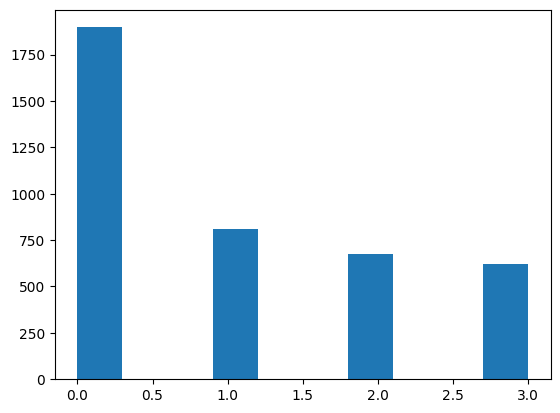

In [69]:
plt.hist(data=air,x='cluster')
plt.show()

In [70]:
from sklearn.metrics import silhouette_score

In [71]:
silhouette_score(mg,bg.fit_predict(mg))

0.47483765255961